## Modul 6: Pendeteksi Tepi
### Soal 1
#### Lakukanlah proses morfologi citra pada gambar tersebut (erosi, dilasi, opening, dan closing) dengan kernel berukuran 5 x 5 (semua nilai di dalamnya adalah 1)!

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv2

cv2 adalah library dari python yang digunakan untuk mengelola objek gambar, penggunaan 'as cv' agar mempersingkat penulisan jika menggunakan librarynya

numpy adalah library dari python yang digunakan untuk memproses komputasi numerik, untuk menggunakan library ini dapat hanya dengan menulis np karna sudah diinisialisasi

matplitlib.pyplot adalah library dari python untuk melakukan visualisasi data seperti membuat plot grafik untuk satu sumbu atau lebih. dapat digunakan hanya dengan menulis plt

(310, 800)


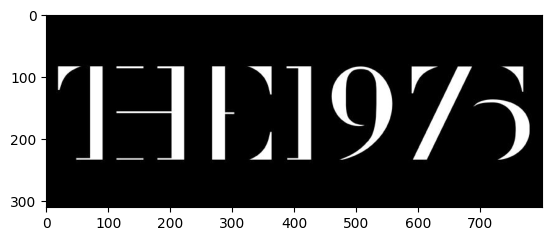

In [16]:
foto=plt.imread('1975.jpg')
foto=cv2.cvtColor(foto,cv2.COLOR_BGR2GRAY)
plt.imshow(foto, cmap = 'gray')
print(foto.shape) 
plt.show()

fungsi foto=plt.imread('1975.jpg'): Menggunakan fungsi plt.imread() untuk membaca gambar dengan nama '1975.jpg' dan menyimpannya dalam variabel 'foto'.
foto=cv2.cvtColor(foto,cv2.COLOR_BGR2GRAY): Menggunakan fungsi cv2.cvtColor() dari modul OpenCV untuk mengubah mode warna gambar menjadi grayscale.
plt.imshow(foto, cmap='gray'): Menampilkan gambar yang disimpan dalam variabel 'foto' menggunakan plot dari modul matplotlib dengan skala keabuan (grayscale).
print(foto.shape): Mencetak bentuk (shape) gambar, yaitu dimensi gambar seperti tinggi, lebar, dan jumlah saluran warna.
plt.show(): Menampilkan plot gambar pada layar.

In [17]:
imgarray = np.array(foto)
kernel = np.array([
   [1,1,1,1,1],
   [1,1,1,1,1],
   [1,1,1,1,1],
   [1,1,1,1,1],
   [1,1,1,1,1]])

fungsi imgarray = np.array(foto): Fungsi ini mengubah gambar yang disimpan dalam variabel 'foto' menjadi array menggunakan fungsi np.array() dari modul NumPy. Hasilnya disimpan dalam variabel 'imgarray'.

kernel = np.array([[1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1]]): Fungsi ini menginisialisasi sebuah kernel dengan menggunakan array 2D. Kernel tersebut memiliki ukuran 5x5 dan setiap elemennya bernilai 1. Kernel ini dapat digunakan dalam operasi pengolahan citra seperti konvolusi.

### EROSI

In [18]:
def erosi(imgarray, kernel):
    result = np.zeros(imgarray.shape)
    for i in range(2, imgarray.shape[0] - 2):
        for j in range(2, imgarray.shape[1] - 2):
            vals = imgarray[i - 2: i + 3, j - 2: j + 3] * kernel
            min_val = vals[0][0]
            for m in range(5):
                for n in range(5):
                    if vals[m][n] < min_val:
                        min_val = vals[m][n]
            result[i, j] = min_val
    return result

Fungsi erosi(imgarray, kernel) merupakan sebuah implementasi dari operasi erosi pada gambar. Operasi erosi bertujuan untuk menghilangkan piksel-piksel dengan nilai intensitas rendah atau kecil di sekitar tepi objek pada gambar.

Dalam fungsi ini, pertama-tama dibuat sebuah larik kosong dengan nama result yang memiliki ukuran yang sama dengan imgarray. Larik result ini akan digunakan untuk menyimpan hasil dari operasi erosi. Selanjutnya, dilakukan iterasi pada setiap piksel dalam gambar, kecuali pada batas luar gambar dengan jarak 2 piksel dari tepi. Pada setiap iterasi, diambil sebuah sublarik 5x5 di sekitar piksel yang sedang diproses. Sublarik ini dikalikan dengan kernel yang diberikan. Kemudian, nilai minimum dari sublarik tersebut ditentukan dan disimpan dalam larik result. Setelah selesai melakukan iterasi pada semua piksel, larik result yang berisi gambar hasil erosi dikembalikan sebagai output fungsi.

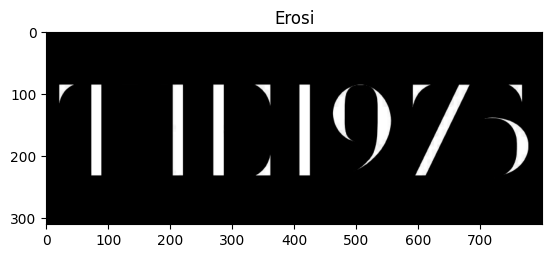

In [19]:
erosi_result = erosi(imgarray, kernel)

plt.imshow(erosi_result, cmap = 'gray')
plt.title("Erosi")
plt.show()

Pada kode tersebut, dilakukan operasi erosi pada gambar dengan menggunakan fungsi erosi. Hasil erosi disimpan dalam variabel erosi_result. Selanjutnya, hasil erosi ditampilkan sebagai plot menggunakan imshow dengan skema warna grayscale. Judul plot ditentukan sebagai "erosi", dan plot ditampilkan pada layar menggunakan fungsi show.

### DILASI

In [20]:
def dilasi(imgarray, kernel):
    result = np.zeros(imgarray.shape)
    for i in range(2, imgarray.shape[0] - 2):
        for j in range(2, imgarray.shape[1] - 2):
            vals = imgarray[i - 2: i + 3, j - 2: j + 3] * kernel
            max_val = vals[0][0]
            for m in range(5):
                for n in range(5):
                    if vals[m][n] > max_val:
                        max_val = vals[m][n]
            result[i, j] = max_val
    return result

Fungsi dilasi(imgarray, kernel) adalah implementasi dari operasi dilasi pada gambar. Operasi dilasi bertujuan untuk memperluas atau memperbesar area objek pada gambar dengan menggabungkan piksel-piksel yang memiliki nilai intensitas tinggi di sekitar objek.

Dalam fungsi ini, pertama-tama dibuat sebuah larik kosong dengan nama result yang memiliki ukuran yang sama dengan imgarray. Larik result ini akan digunakan untuk menyimpan hasil dari operasi dilasi. Selanjutnya, dilakukan iterasi pada setiap piksel dalam gambar, kecuali pada batas luar gambar dengan jarak 2 piksel dari tepi. Pada setiap iterasi, diambil sebuah sublarik 5x5 di sekitar piksel yang sedang diproses. Sublarik ini dikalikan dengan kernel yang diberikan. Kemudian, nilai maksimum dari sublarik tersebut ditentukan dan disimpan dalam larik result. Setelah selesai melakukan iterasi pada semua piksel, larik result yang berisi gambar hasil dilasi dikembalikan sebagai output fungsi.

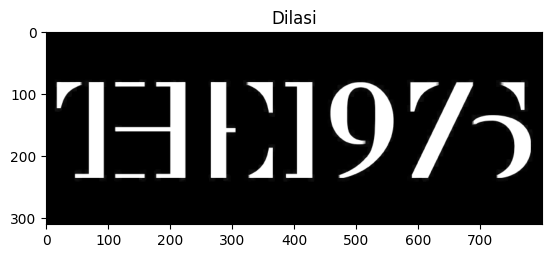

In [21]:
dilasi_result = dilasi(imgarray, kernel)

plt.imshow(dilasi_result, cmap = 'gray')
plt.title("Dilasi")
plt.show()

Pada kode tersebut, dilakukan operasi dilasi pada gambar dengan menggunakan fungsi dilasi. Hasil dilasi disimpan dalam variabel dilasi_result. Selanjutnya, hasil dilasi ditampilkan sebagai plot menggunakan imshow dengan skema warna grayscale. Judul plot ditentukan sebagai "Dilasi", dan plot ditampilkan pada layar menggunakan fungsi show.

### OPENING

In [22]:
def opening(imgarray, kernel):
    eroded = erosi(imgarray, kernel)
    opened = dilasi(eroded, kernel)
    return opened

Fungsi opening(imgarray, kernel) merupakan implementasi dari operasi opening pada gambar. Operasi opening adalah kombinasi dari operasi erosi diikuti oleh operasi dilasi pada gambar.

Dalam fungsi ini, pertama-tama dilakukan pemanggilan fungsi erosi dengan memberikan argumen imgarray (larik gambar) dan kernel. Hasil dari operasi erosi disimpan dalam variabel eroded. Selanjutnya, dilakukan pemanggilan fungsi dilasi dengan memberikan argumen eroded (hasil erosi) dan kernel. Hasil dari operasi dilasi tersebut disimpan dalam variabel opened. Akhirnya, variabel opened yang berisi gambar hasil operasi opening dikembalikan sebagai output fungsi.

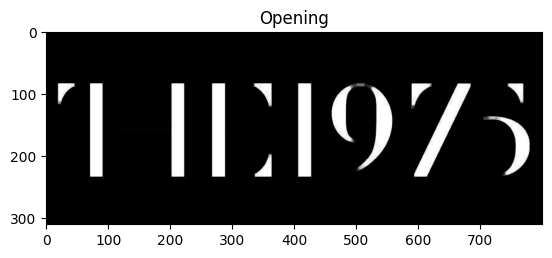

In [23]:
opening_result = opening(imgarray, kernel)

plt.imshow(opening_result, cmap = 'gray')
plt.title("Opening")
plt.show()

Pada kode tersebut, dilakukan operasi opening pada gambar dengan menggunakan fungsi opening. Hasil opening disimpan dalam variabel opening_result. Selanjutnya, hasil opening ditampilkan sebagai plot menggunakan imshow dengan skema warna grayscale. Judul plot ditentukan sebagai "opening", dan plot ditampilkan pada layar menggunakan fungsi show.

### CLOSING

In [24]:
def closing(imgarray, kernel):
    dilated = dilasi(imgarray, kernel)
    closed = erosi(dilated, kernel)
    return closed

Fungsi closing(imgarray, kernel) merupakan implementasi dari operasi closing pada gambar. Operasi closing adalah kombinasi dari operasi dilasi diikuti oleh operasi erosi pada gambar.

Dalam fungsi ini, pertama-tama dilakukan pemanggilan fungsi dilasi dengan memberikan argumen imgarray (larik gambar) dan kernel. Hasil dari operasi dilasi disimpan dalam variabel dilated. Selanjutnya, dilakukan pemanggilan fungsi erosi dengan memberikan argumen dilated (hasil dilasi) dan kernel. Hasil dari operasi erosi tersebut disimpan dalam variabel closed. Akhirnya, variabel closed yang berisi gambar hasil operasi closing dikembalikan sebagai output fungsi.

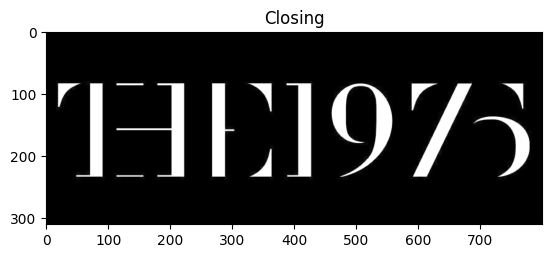

In [25]:
closing_result = closing(imgarray, kernel)

plt.imshow(closing_result, cmap = 'gray')
plt.title("Closing")
plt.show()

Pada kode tersebut, dilakukan operasi closing pada gambar dengan menggunakan fungsi closing. Hasil closing disimpan dalam variabel closing_result. Selanjutnya, hasil closing ditampilkan sebagai plot menggunakan imshow dengan skema warna grayscale. Judul plot ditentukan sebagai "closing", dan plot ditampilkan pada layar menggunakan fungsi show.

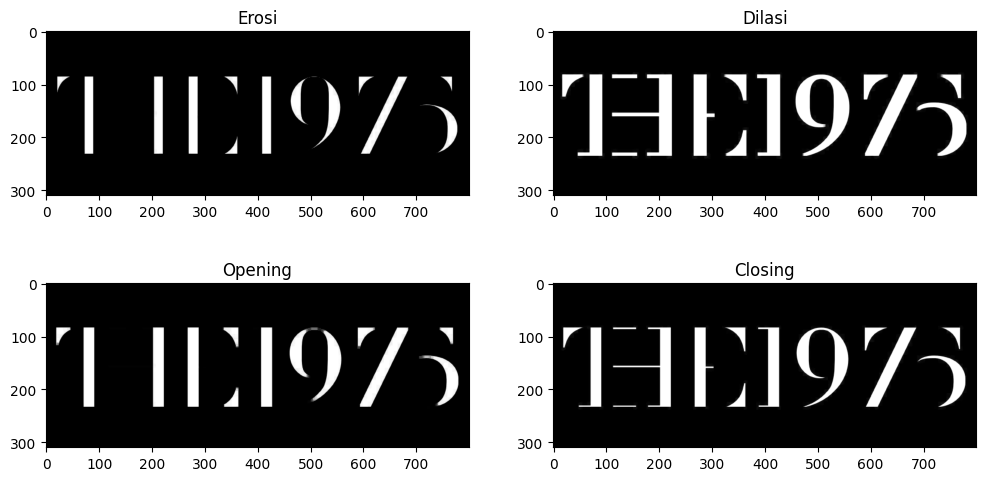

In [26]:
erosi_result = erosi(imgarray, kernel)
dilasi_result = dilasi(imgarray, kernel)
opening_result = opening(imgarray, kernel)
closing_result = closing(imgarray, kernel)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1), plt.imshow(erosi_result, cmap = 'gray'), plt.title("Erosi")
plt.subplot(2, 2, 2), plt.imshow(dilasi_result, cmap = 'gray'), plt.title("Dilasi")
plt.subplot(2, 2, 3), plt.imshow(opening_result, cmap = 'gray'), plt.title("Opening")
plt.subplot(2, 2, 4), plt.imshow(closing_result, cmap ='gray'), plt.title("Closing")
plt.show()

Pada kode tersebut, terdapat empat pemanggilan fungsi untuk operasi erosi, dilasi, opening, dan closing pada gambar dengan menggunakan kernel yang sama. Hasil dari masing-masing operasi tersebut disimpan dalam variabel erosi_result, dilasi_result, opening_result, dan closing_result.

Selanjutnya, menggunakan library matplotlib.pyplot, hasil dari empat operasi tersebut ditampilkan dalam bentuk empat subplot pada satu gambar. Setiap subplot menampilkan hasil operasi yang berbeda dengan skema warna grayscale. Judul setiap subplot menggambarkan jenis operasi yang dilakukan, yaitu "Erosion", "Dilation", "Opening", dan "Closing".

### SOAL TAMBAHAN (OPSIONAL)
#### lakukanlah proses morfologi citra jenis gradien morfologi pada citra dengan kernel yang sama

In [27]:
def morfologi_gradien(imgarray, kernel):
    dilated = dilasi(imgarray, kernel)
    eroded = erosi(imgarray, kernel)
    gradient = dilated - eroded
    return gradient

Fungsi morphological_gradient(imgarray, kernel) merupakan implementasi dari operasi gradient morfologi pada gambar. Operasi ini menghasilkan perbedaan antara gambar hasil dilasi dan gambar hasil erosi.

Dalam fungsi ini, pertama-tama dilakukan pemanggilan fungsi dilasi dengan memberikan argumen imgarray (larik gambar) dan kernel. Hasil dari operasi dilasi disimpan dalam variabel dilated. Selanjutnya, dilakukan pemanggilan fungsi erosi dengan memberikan argumen imgarray dan kernel. Hasil dari operasi erosi disimpan dalam variabel eroded.
Selanjutnya, dilakukan pengurangan antara dilated dan eroded, sehingga menghasilkan larik yang merepresentasikan gradient morfologi. Hasil gradient morfologi ini disimpan dalam variabel gradient.
Akhirnya, variabel gradient yang berisi gambar hasil operasi gradient morfologi dikembalikan sebagai output fungsi.

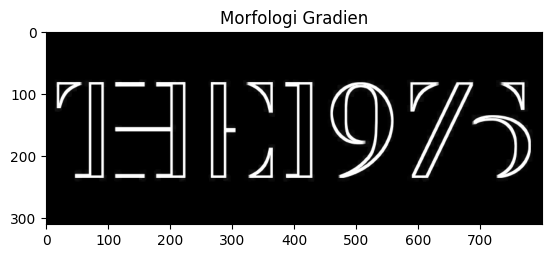

In [28]:
gradient_result = morfologi_gradien(imgarray, kernel)

plt.imshow(gradient_result, cmap = 'gray')
plt.title("Morfologi Gradien")
plt.show()

Pada kode tersebut, dilakukan operasi morfologi pada gambar dengan menggunakan fungsi morfologi. Hasil morfologi disimpan dalam variabel morfologi_result. Selanjutnya, hasil morfologi ditampilkan sebagai plot menggunakan imshow dengan skema warna grayscale. Judul plot ditentukan sebagai "morfologi", dan plot ditampilkan pada layar menggunakan fungsi show.